## GAN

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [17]:
def col_names(dataframe, cat_th = 10):
    
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_cols = cat_cols + num_but_cat
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols

cat_cols, num_cols = col_names(data)

In [16]:
data["Class"].unique()

array([0, 1], dtype=int64)

In [18]:
cat_cols

['Class']

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

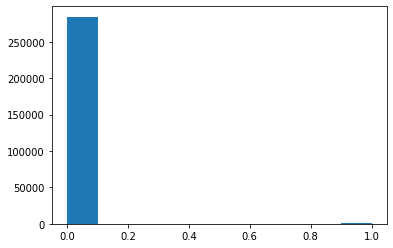

In [25]:
plt.hist(data['Class'])

In [26]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [32]:
norm = data[data['Class'] == 0]
anorm = data[data['Class'] == 1]

In [33]:
norm_data = norm.drop(columns=['Class'])

In [93]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)  
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 30) 
        self.leaky_relu = nn.LeakyReLU(0.2) 
        self.tanh = nn.Tanh()  

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.tanh(self.fc4(x))
        return x

In [94]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(30, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.leaky_relu = nn.LeakyReLU(0.2) 

    def forward(self, x):
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x)) 
        return x

In [95]:
criterion = nn.BCELoss() 

generator = Generator()
discriminator = Discriminator()

optimizer_g = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))

In [78]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        return torch.tensor(sample, dtype=torch.float32)

In [36]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(norm_data)

In [79]:
data_array = np.array(normalized_data)

dataset = CustomDataset(data_array)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [96]:
def train_gan(generator, discriminator, data_loader, num_epochs=10, d_steps=1, g_steps=1):
    feature_dim = 30

    criterion = nn.BCELoss()
    optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))
    optimizer_g = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.5, 0.999))

    for epoch in range(num_epochs):
        for real_data in data_loader:
            real_data = real_data.view(-1, feature_dim)
            batch_size = real_data.size(0)


            for _ in range(d_steps):
                optimizer_d.zero_grad()

                labels = torch.ones(batch_size, 1)
                output = discriminator(real_data)
                loss_real = criterion(output, labels)
                loss_real.backward()

                noise = torch.randn(batch_size, 100)
                fake_data = generator(noise)
                labels = torch.zeros(batch_size, 1)

                output = discriminator(fake_data.detach())
                loss_fake = criterion(output, labels)
                loss_fake.backward()
                optimizer_d.step()

            for _ in range(g_steps):
                optimizer_g.zero_grad()

                output = discriminator(fake_data)
                loss_g = criterion(output, torch.ones(batch_size, 1))
                loss_g.backward()
                optimizer_g.step()

        print(f'Epoch {epoch+1}/{num_epochs} | D Loss: {loss_real.item() + loss_fake.item()} | G Loss: {loss_g.item()}')

In [97]:
train_gan(generator, discriminator, data_loader, num_epochs=7)

Epoch 1/7 | D Loss: 1.380455493927002 | G Loss: 0.6808693408966064
Epoch 2/7 | D Loss: 1.3769623041152954 | G Loss: 0.6811625361442566
Epoch 3/7 | D Loss: 1.3740333318710327 | G Loss: 0.6808539628982544
Epoch 4/7 | D Loss: 1.3793615698814392 | G Loss: 0.6808083057403564
Epoch 5/7 | D Loss: 1.3767172694206238 | G Loss: 0.6808280944824219
Epoch 6/7 | D Loss: 1.3814929127693176 | G Loss: 0.6811266541481018
Epoch 7/7 | D Loss: 1.380483865737915 | G Loss: 0.6809031963348389


In [98]:
def generate_fake_data(generator, num_samples=10):
    noise = torch.randn(num_samples, 100) 
    fake_data = generator(noise)
    return fake_data.detach().numpy()

In [103]:
generated_data = generate_fake_data(generator, num_samples=10)

In [104]:
original_scale_data = scaler.inverse_transform(generated_data)

In [101]:
with torch.no_grad():
    discriminator_scores = discriminator(torch.tensor(generated_data, dtype=torch.float32))
    print(discriminator_scores)

tensor([[0.5054],
        [0.5064],
        [0.5063],
        [0.5059],
        [0.5055],
        [0.5057],
        [0.5066],
        [0.5059],
        [0.5061],
        [0.5064]])


In [113]:
def compute_anomaly_score(real_data, generator, discriminator, threshold=0.4):
    with torch.no_grad():
        
        real_scores = discriminator(real_data)
        noise = torch.randn(real_data.size(0), 100)
        fake_data = generator(noise)
        fake_scores = discriminator(fake_data)
        anomalies = real_scores < threshold
        
    return anomalies, real_scores, fake_scores

real_data_batch = next(iter(data_loader))
anomalies, real_scores, fake_scores = compute_anomaly_score(real_data_batch, generator, discriminator, threshold=0.4)

print("Anomali Sonucu:", anomalies)
print("Gerçek Skorlar:", real_scores)
print("Sahte Skorlar:", fake_scores)

Anomali Sonucu: tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]

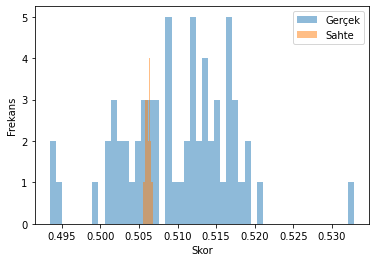

In [114]:
plt.hist(real_scores.numpy(), bins=50, alpha=0.5, label='Gerçek')
plt.hist(fake_scores.numpy(), bins=50, alpha=0.5, label='Sahte')
plt.legend(loc='upper right')
plt.xlabel('Skor')
plt.ylabel('Frekans')
plt.show()